In [1]:
import pandas as pd
import numpy as np

import os
import sys

# librosa is a Python library for analyzing audio and music. It can be used to extract the data from the audio files we will see it later.
import librosa
import librosa.display
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

# to play the audio files
from IPython.display import Audio

## RAVDESS

In [3]:
Ravdess = "/home/sedunov_ia/project_mtl/multitask_learning_ASR_KWS/data/ravdess/"
ravdess_directory_list = os.listdir(Ravdess)

file_emotion = []
file_path = []
for dir in ravdess_directory_list:
    # as their are 20 different actors in our previous directory we need to extract files for each actor.
    actor = os.listdir(Ravdess + dir)
    for file in actor:
        part = file.split('.')[0]
        part = part.split('-')
        # third part in each file represents the emotion associated to that file.
        file_emotion.append(int(part[2]))
        file_path.append(Ravdess + dir + '/' + file)
        
# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

# dataframe for path of files.
path_df = pd.DataFrame(file_path, columns=['Path'])
Ravdess_df = pd.concat([emotion_df, path_df], axis=1)

# changing integers to actual emotions.
Ravdess_df.Emotions.replace({1:'neutral', 2:'calm', 3:'happy', 4:'sad', 5:'angry', 6:'fear', 7:'disgust', 8:'surprise'}, inplace=True)
Ravdess_df.head()

,Emotions,Path
0,happy,/home/sedunov_ia/project_mtl/multitask_learnin...
1,angry,/home/sedunov_ia/project_mtl/multitask_learnin...
2,angry,/home/sedunov_ia/project_mtl/multitask_learnin...
3,happy,/home/sedunov_ia/project_mtl/multitask_learnin...
4,angry,/home/sedunov_ia/project_mtl/multitask_learnin...


<AxesSubplot:>

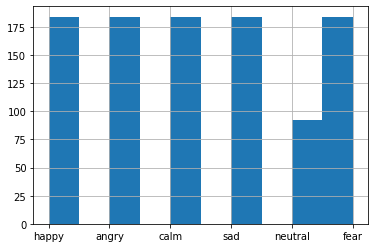

In [4]:
Ravdess_df['Emotions'].hist()

## Crema D

In [21]:
Crema = "/home/sedunov_ia/project_mtl/multitask_learning_ASR_KWS/data/cremad/AudioWAV/"
crema_directory_list = os.listdir(Crema)
file_emotion = []
file_path = []

for file in crema_directory_list:
    # storing file paths
    file_path.append(Crema + file)
    # storing file emotions
    part=file.split('_')
    if part[2] == 'SAD':
        file_emotion.append('sad')
    elif part[2] == 'ANG':
        file_emotion.append('angry')
    elif part[2] == 'DIS':
        file_emotion.append('disgust')
    elif part[2] == 'FEA':
        file_emotion.append('fear')
    elif part[2] == 'HAP':
        file_emotion.append('happy')
    elif part[2] == 'NEU':
        file_emotion.append('neutral')
    else:
        file_emotion.append('Unknown')
        
# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])
# dataframe for path of files.
path_df = pd.DataFrame(file_path, columns=['Path'])
Crema_df = pd.concat([emotion_df, path_df], axis=1)

## Tess

In [12]:
Tess = "/home/sedunov_ia/project_mtl/multitask_learning_ASR_KWS/data/tess/tess toronto emotional speech set data/TESS Toronto emotional speech set data/"
tess_directory_list = os.listdir(Tess)

file_emotion = []
file_path = []

for dir in tess_directory_list:
    directories = os.listdir(Tess + dir)
    for file in directories:
        part = file.split('.')[0]
        part = part.split('_')[2]
        if part=='ps':
            file_emotion.append('surprise')
        else:
            file_emotion.append(part)
        file_path.append(Tess + dir + '/' + file)
        
# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

# dataframe for path of files.
path_df = pd.DataFrame(file_path, columns=['Path'])
Tess_df = pd.concat([emotion_df, path_df], axis=1)
Tess_df.head()

,Emotions,Path
0,neutral,/home/sedunov_ia/project_mtl/multitask_learnin...
1,neutral,/home/sedunov_ia/project_mtl/multitask_learnin...
2,neutral,/home/sedunov_ia/project_mtl/multitask_learnin...
3,neutral,/home/sedunov_ia/project_mtl/multitask_learnin...
4,neutral,/home/sedunov_ia/project_mtl/multitask_learnin...


## SAVEE

In [18]:
import glob, os

Savee = "/home/sedunov_ia/project_mtl/multitask_learning_ASR_KWS/data/savee/audiodata/AudioData/"
savee_directory_list = os.listdir(Savee)

files_paths = glob.glob("/home/sedunov_ia/project_mtl/multitask_learning_ASR_KWS/data/savee/audiodata/AudioData/*/*.wav")

file_emotion = []
file_path = []

for file in files_paths:
    file_path.append(file)
    base_name = os.path.basename(file)
    if base_name.startswith('a'):
        file_emotion.append('angry')
    elif base_name.startswith('d'):
        file_emotion.append('disgust')
    elif base_name.startswith('f'):
        file_emotion.append('fear')
    elif base_name.startswith('h'):
        file_emotion.append('happy')
    elif base_name.startswith('n'):
        file_emotion.append('neutral')
    elif base_name.startswith('sa'):
        file_emotion.append('sad')
    else:
        file_emotion.append('surprise')
        
# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

# dataframe for path of files.
path_df = pd.DataFrame(file_path, columns=['Path'])
Savee_df = pd.concat([emotion_df, path_df], axis=1)
Savee_df.head()

,Emotions,Path
0,happy,/home/sedunov_ia/project_mtl/multitask_learnin...
1,sad,/home/sedunov_ia/project_mtl/multitask_learnin...
2,neutral,/home/sedunov_ia/project_mtl/multitask_learnin...
3,sad,/home/sedunov_ia/project_mtl/multitask_learnin...
4,disgust,/home/sedunov_ia/project_mtl/multitask_learnin...


In [22]:
# creating Dataframe using all the 4 dataframes we created so far.
data_path = pd.concat([Ravdess_df, Crema_df, Tess_df, Savee_df], axis = 0)
data_path.head()

,Emotions,Path
0,happy,/home/sedunov_ia/project_mtl/multitask_learnin...
1,angry,/home/sedunov_ia/project_mtl/multitask_learnin...
2,angry,/home/sedunov_ia/project_mtl/multitask_learnin...
3,happy,/home/sedunov_ia/project_mtl/multitask_learnin...
4,angry,/home/sedunov_ia/project_mtl/multitask_learnin...


In [24]:
data_path.loc[data_path.Emotions == 'calm', 'Emotions'] = 'neutral'
data_path.loc[data_path.Emotions == 'surprise', 'Emotions'] = 'neutral'

<AxesSubplot:>

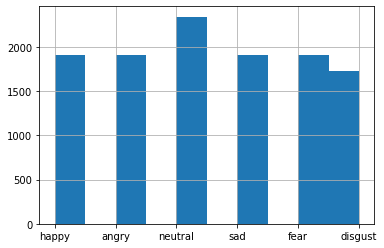

In [25]:
data_path['Emotions'].hist()

In [26]:
data_path.to_csv("/home/sedunov_ia/project_mtl/multitask_learning_ASR_KWS/data/emo_data.csv",index=False)

In [2]:
import pandas as pd
data_path = pd.read_csv("/home/sedunov_ia/project_mtl/multitask_learning_ASR_KWS/data/emo_data.csv")

In [3]:
data_path['emotions'] = data_path['Emotions']
data_path['label'], _ = pd.factorize(data_path['emotions'])
data_path['wav'] = data_path['Path']

In [27]:
len(data_path)

11734

In [10]:
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(data_path[['wav', 'label', 'emotions']], test_size=0.2, random_state=42)

In [13]:
df_train.to_csv('/home/sedunov_ia/project_mtl/multitask_learning_ASR_KWS/data/train_emo_en.csv', index=False, sep='|')
df_test.to_csv('/home/sedunov_ia/project_mtl/multitask_learning_ASR_KWS/data/test_emo_en.csv', index=False, sep='|')

In [12]:
df_train['emotions'].unique(), df_test['emotions'].unique()

(array(['neutral', 'fear', 'happy', 'angry', 'disgust', 'sad'],
       dtype=object),
 array(['disgust', 'neutral', 'happy', 'angry', 'fear', 'sad'],
       dtype=object))

## Resampling

In [15]:
"/home/sedunov_ia/project_mtl/multitask_learning_ASR_KWS.wav"[:-4]

'/home/sedunov_ia/project_mtl/multitask_learning_ASR_KWS'

In [8]:
import torchaudio, os
import torchaudio.transforms as T
from tqdm import tqdm
dst_fld = "/home/sedunov_ia/project_mtl/multitask_learning_ASR_KWS/data/data_emo_resampled/audio"
records = []
not_mono = []
for _, row in tqdm(data_path.iterrows()):
    wav, sr = torchaudio.load(row['wav'])
    if len(wav.size()) > 2:
        print("not mono")
        not_mono.append(row['wav'])
        continue
    dur = wav.size()[1]/sr
    dst_path = row['wav']
    if sr != 16000:
        base_name = os.path.basename(row['wav'])
        dst_path = os.path.join(dst_fld, f"{base_name[:-4]}_resampled.wav")
        wav = T.Resample(orig_freq=sr, new_freq=16000)(wav)
        torchaudio.save(dst_path, wav, 16000)
    records.append({
        'wav': dst_path, 'label': row['label'], 'emotions': row['emotions'], 'dur': dur, 'init_sr': sr
    })

11734it [57:43,  3.39it/s] 


In [11]:
from sklearn.model_selection import train_test_split

df_rec_resampled = pd.DataFrame().from_records(records)

df_train, df_test = train_test_split(df_rec_resampled, test_size=0.2, random_state=42)
df_train.to_csv('/home/sedunov_ia/project_mtl/multitask_learning_ASR_KWS/data/train_emo_en_resampled.csv', index=False, sep='|')
df_test.to_csv('/home/sedunov_ia/project_mtl/multitask_learning_ASR_KWS/data/test_emo_en_resampled.csv', index=False, sep='|')

In [7]:
import pandas as pd
df = pd.read_csv('/home/sedunov_ia/project_mtl/multitask_learning_ASR_KWS/other/train_kws.csv')
len(df.keyword.unique())

30

## Dusha

In [1]:
import pandas as pd

df_train = pd.read_csv('/home/sedunov_ia/emotion_recognition/data_dusha_and_prev_emo_35k_per_class/train_before_gsm.csv', sep='|')
df_test = pd.read_csv('/home/sedunov_ia/emotion_recognition/data_dusha_and_prev_emo_35k_per_class/test_before_gsm.csv', sep='|')


In [8]:
df_train_sample = df_train.sample(20000)
df_train_sample.to_csv('/home/sedunov_ia/emotion_recognition/data_dusha_and_prev_emo_35k_per_class/train_before_gsm_sample.csv', sep='|', index=False)

In [9]:
df_test_sample = df_train.sample(9000)
df_test_sample.to_csv('/home/sedunov_ia/emotion_recognition/data_dusha_and_prev_emo_35k_per_class/test_before_gsm_sample.csv', sep='|', index=False)
